In [285]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [286]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit

In [287]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

## Updated peak finding algorithm 

The peaks below 10e-1 in the low frequency are removed 

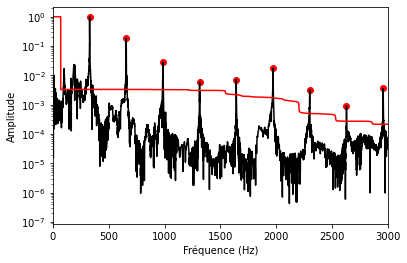

In [436]:
wood = Sound('soundfiles/flax_carbon/Wood_E1_1.wav')
wood.condition()
wood.SP.change('fft_range', 5000)
wood.signal.plot('peaks', peak_height=True)
plt.xlim((0,3000))
plt.show()

# Finding the Cavity peak

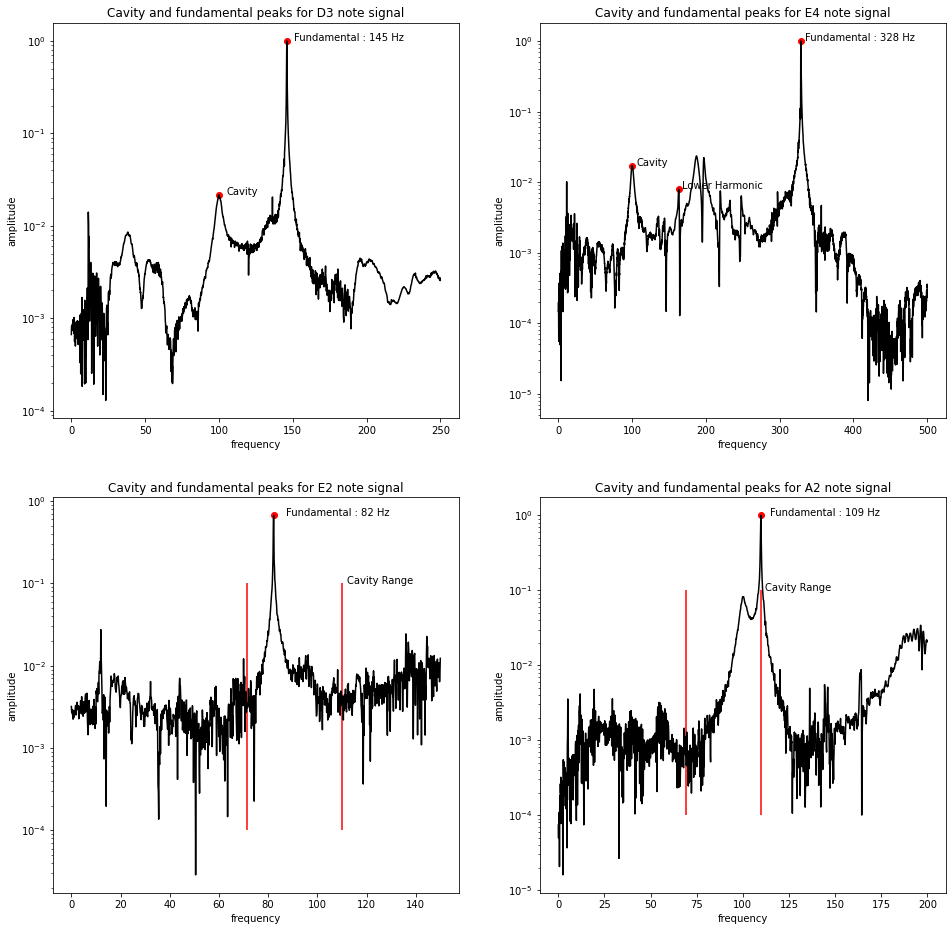

In [366]:
plt.figure(figsize=(16,16))

plt.subplot(221)
# Signal with fundamental at 146 Hz
wood = Sound('soundfiles/flax_carbon/Wood_D0_2.wav')
wood.condition()
wood.SP.change('fft_range', 250)
fft = wood.signal.fft()
fft_freq = wood.signal.fft_frequencies()

fundamental_peak1 = wood.signal.peaks()[0]
cavity_lower_range = np.where(fft_freq >= 75)[0][0]
cavity_upper_range = np.where(fft_freq >= 110)[0][0]
cavity_peak = np.argmax(fft[cavity_lower_range:cavity_upper_range]) + cavity_lower_range

wood.signal.plot('fft', c='k')
plt.scatter(fft_freq[fundamental_peak1], fft[fundamental_peak1], c='r')
plt.annotate('Fundamental : ' + str(int(fft_freq[fundamental_peak1])) + ' Hz', (fft_freq[fundamental_peak1]+5, fft[fundamental_peak1]))
plt.scatter(fft_freq[cavity_peak], fft[cavity_peak], c='r')
plt.annotate('Cavity',(fft_freq[cavity_peak]+5, fft[cavity_peak]))
plt.title('Cavity and fundamental peaks for D3 note signal')

plt.subplot(222)
# Signal with fundamental at 330 Hz
wood = Sound('soundfiles/flax_carbon/Wood_E1_1.wav')
wood.condition()
wood.SP.change('fft_range', 500)
fft = wood.signal.fft()
fft_freq = wood.signal.fft_frequencies()
fundamental_peak = wood.signal.peaks()[0]
cavity_lower_range = np.where(fft_freq >= 75)[0][0]
cavity_upper_range = np.where(fft_freq >= 110)[0][0]
cavity_peak = np.argmax(fft[cavity_lower_range:cavity_upper_range]) + cavity_lower_range
lower_harmonic = fft_freq[fundamental_peak]//2
harmonic_lower_range = np.where(fft_freq>=lower_harmonic-10)[0][0]
harmonic_upper_range = np.where(fft_freq>=lower_harmonic+10)[0][0]
harmonic_peak = np.argmax(fft[harmonic_lower_range:harmonic_upper_range]) + harmonic_lower_range

wood.signal.plot('fft', c='k')
plt.scatter(fft_freq[fundamental_peak], fft[fundamental_peak], c='r')
plt.annotate('Fundamental : ' + str(int(fft_freq[fundamental_peak])) + ' Hz', (fft_freq[fundamental_peak]+5, fft[fundamental_peak]))
plt.scatter(fft_freq[cavity_peak], fft[cavity_peak], c='r')
plt.annotate('Cavity',(fft_freq[cavity_peak]+5, fft[cavity_peak]))
plt.scatter(fft_freq[harmonic_peak], fft[harmonic_peak], c='r')
plt.annotate('Lower Harmonic',(fft_freq[harmonic_peak]+5, fft[harmonic_peak]))
plt.title('Cavity and fundamental peaks for E4 note signal')

plt.subplot(223)
# Signal with fundamental at 86 Hz
wood = Sound('soundfiles/flax_carbon/Wood_E0_1.wav')
wood.condition()
wood.SP.change('fft_range', 150)
fft = wood.signal.fft()
fft_freq = wood.signal.fft_frequencies()

fundamental_peak = wood.signal.peaks()[0]
cavity_lower_range = np.where(fft_freq >= 75)[0][0]
cavity_upper_range = np.where(fft_freq >= 110)[0][0]

wood.signal.plot('fft', c='k')
plt.scatter(fft_freq[fundamental_peak], fft[fundamental_peak], c='r')
plt.annotate('Fundamental : ' + str(int(fft_freq[fundamental_peak])) + ' Hz', (fft_freq[fundamental_peak]+5, fft[fundamental_peak]))
plt.vlines([fft_freq[cavity_lower_range-25], fft_freq[cavity_upper_range]], 10e-5, 10e-2, color='r')
plt.annotate('Cavity Range',(fft_freq[cavity_upper_range]+2, 10e-2))
plt.title('Cavity and fundamental peaks for E2 note signal')

plt.subplot(224)
# Signal with fundamental at 110 Hz
wood = Sound('soundfiles/flax_carbon/Wood_A0_1.wav')
wood.condition()
wood.SP.change('fft_range', 200)
fft = wood.signal.fft()
fft_freq = wood.signal.fft_frequencies()

fundamental_peak = wood.signal.peaks()[0]
cavity_lower_range = np.where(fft_freq >= 75)[0][0]
cavity_upper_range = np.where(fft_freq >= 110)[0][0]

wood.signal.plot('fft', c='k')
plt.scatter(fft_freq[fundamental_peak], fft[fundamental_peak], c='r')
plt.annotate('Fundamental : ' + str(int(fft_freq[fundamental_peak])) + ' Hz', (fft_freq[fundamental_peak]+5, fft[fundamental_peak]))
plt.vlines([fft_freq[cavity_lower_range-50], fft_freq[cavity_upper_range]], 10e-5, 10e-2, color='r')
plt.annotate('Cavity Range',(fft_freq[cavity_upper_range]+2, 10e-2))
plt.title('Cavity and fundamental peaks for A2 note signal')

plt.show()


Pour les signaux avec la fondamentale inférieure à ~110Hz le pic de la cavité est caché par le pic de la fondamentale

## Finding the cavity peak 

In [368]:
guit.SP.change('fft_range', 5000)
# First get the fundamentals
Sound1 = Sound('soundfiles/flax_carbon/Wood_D0_2.wav')
Sound1.condition()
Sound2 = Sound('soundfiles/flax_carbon/Wood_E1_1.wav')
Sound2.condition()
Sound3 = Sound('soundfiles/flax_carbon/Wood_E0_1.wav')
Sound3.condition()
Sound4 = Sound('soundfiles/flax_carbon/Wood_A0_1.wav')
Sound4.condition()
Sounds = [Sound1, Sound2, Sound3, Sound4]

fundamentals = []
max_freqs = []
for sound in Sounds:
    fundamental_index = sound.signal.peaks()[0]
    fundamentals.append(sound.signal.fft_frequencies()[fundamental_index])
    max_freq_index = np.argmax(sound.signal.fft())
    max_freqs.append(sound.signal.fft_frequencies()[max_freq_index])
    
names = ['D3', 'E4', 'E2', 'A2']
col = ['Fundamental', 'max frequency']
fundamentals = np.array(fundamentals)
max_freqs = np.array(max_freqs)
data = np.vstack([fundamentals, max_freqs])

Fundm = pd.DataFrame(data=data, columns = names, index = col)
Fundm

,D3,E4,E2,A2
Fundamental,145.96639,328.707941,82.258888,109.704528
max frequency,145.96639,328.707941,164.229148,109.704528


For signal with low fundamental the max value of the FFT is not the fundamental, so it is not a reliable way to find it

## Testing the peak finding function 

soundfiles/test_leste/2-10.wav  does not exists
soundfiles/test_leste/3-10.wav  does not exists
soundfiles/test_leste/4-10.wav  does not exists
soundfiles/test_leste/7-10.wav  does not exists


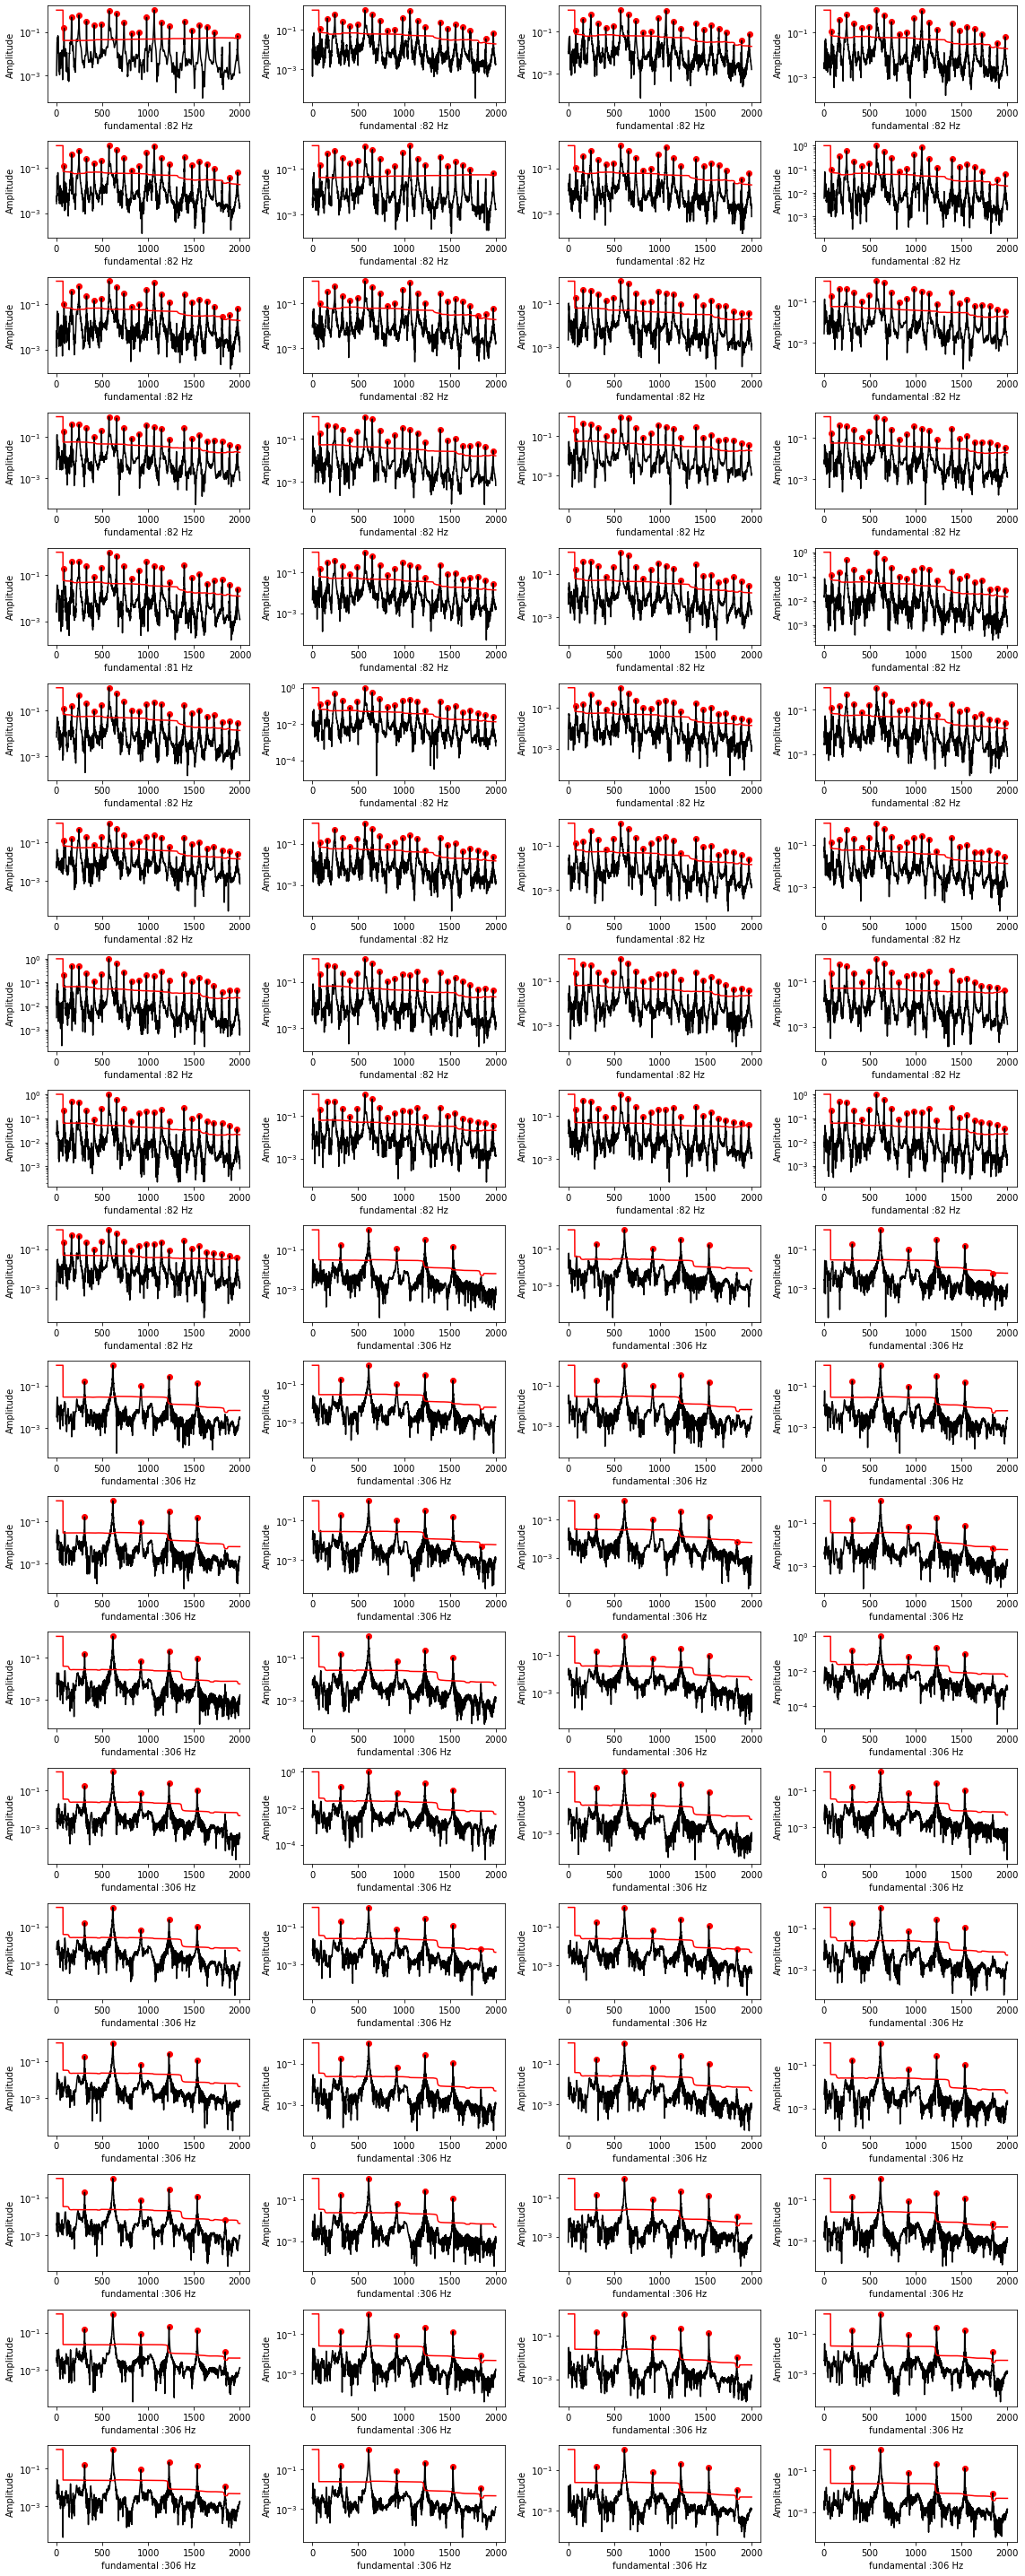

In [433]:
#Get some data
filebase = 'soundfiles/test_leste/'
sounds = []

for first_index in range(1, 9):
    for second_index in range(1, 11):
        filename = filebase + str(first_index) + '-' + str(second_index) + '.wav'
        try:
            sound = Sound(filename, name=filename[-2:-5])
            sound.condition(verbose=False)
            sound.SP.change('fft_range', 2000)
            sounds.append(sound)
        except:
            print(filename, ' does not exists')

# Plot the data
fig, axes = plt.subplots(19, 4, figsize=(16,40))
axes = [ax for ax_list in axes for ax in ax_list]
for sound, ax in zip(sounds, axes) : 
    plt.sca(ax)
    sound.signal.plot('peaks', peak_height=True)
    ax.set_xlabel('fundamental :' + str(int(sound.signal.fundamental())) + ' Hz')
    
plt.tight_layout()

A 10e-1 threshold was added to remove the small peaks in the low frequency range.

We can only find the cavity frequency for the signal where the fundamental does not hide the cavity peak

## Finding the cavity peak for all the 306 Hz signals

A 80-110 Hz range gave good results to find the cavity peak

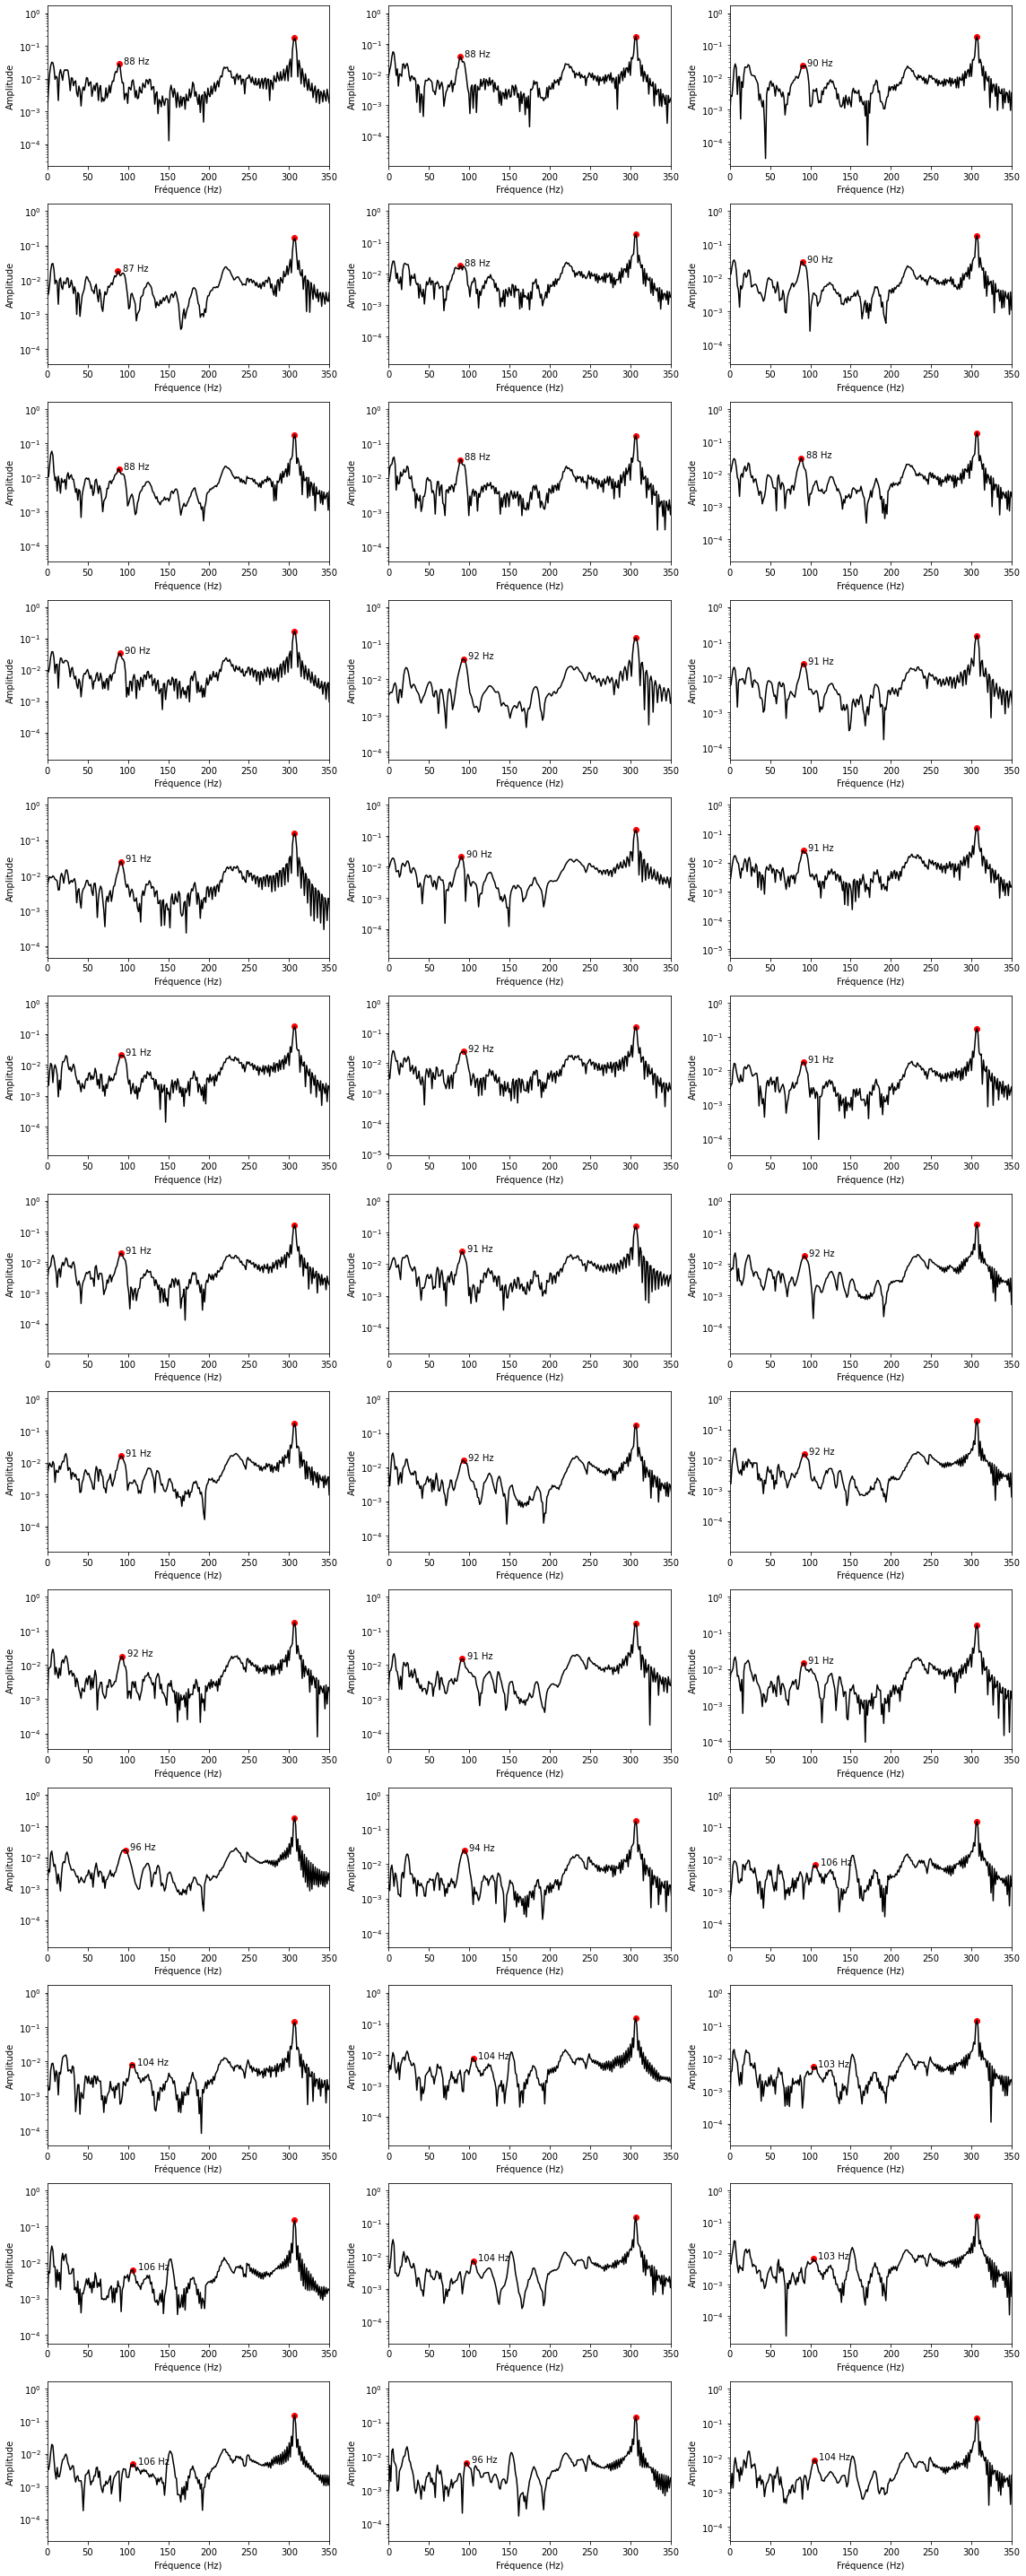

In [434]:
hi_sounds = [sound for sound in sounds if sound.signal.fundamental()>100] # Only the Higher ones
fig, axes = plt.subplots(13, 3, figsize=(16,40))
axes = [ax for ax_list in axes for ax in ax_list]

for sound, ax in zip(hi_sounds, axes):
    plt.sca(ax)
    sound.signal.plot('peaks')
    plt.xlim((0,350))
    
    first_index = np.where(sound.signal.fft_frequencies() >= 80)[0][0]
    second_index = np.where(sound.signal.fft_frequencies() >=110)[0][0]
    cavity_peak = np.argmax(sound.signal.fft()[first_index:second_index]) + first_index
    plt.scatter(sound.signal.fft_frequencies()[cavity_peak], sound.signal.fft()[cavity_peak], c='r')
    plt.annotate(str(int(sound.signal.fft_frequencies()[cavity_peak])) + ' Hz', (sound.signal.fft_frequencies()[cavity_peak]+6, sound.signal.fft()[cavity_peak]))

plt.tight_layout()

## Implementation

In [415]:
wood = Sound('soundfiles/flax_carbon/Wood_D0_2.wav')
wood.condition()
carbon = Sound('soundfiles/flax_carbon/Carbon_D0_2.wav')
carbon.condition()
low_note = Sound('soundfiles/flax_carbon/Wood_A0_1.wav')
low_note.condition()

print('Wood Cavity : ', int(wood.signal.cavity_frequency()), ' Hz')
print('Wood Fundamental : ', int(wood.signal.fundamental()), ' Hz')
print('\n')
print('Carbon Cavity : ', int(carbon.signal.cavity_frequency()), ' Hz')
print('Carbon Fundamental : ', int(carbon.signal.fundamental()), ' Hz')
print('\n')
print('Low note Cavity : ', int(low_note.signal.cavity_frequency()), ' Hz')
print('Low note Fundamental : ', int(low_note.signal.fundamental()), ' Hz')

Wood Cavity :  99  Hz
Wood Fundamental :  145  Hz


Carbon Cavity :  105  Hz
Carbon Fundamental :  146  Hz


Cavity peak is obscured by the fundamental
Low note Cavity :  0  Hz
Low note Fundamental :  109  Hz


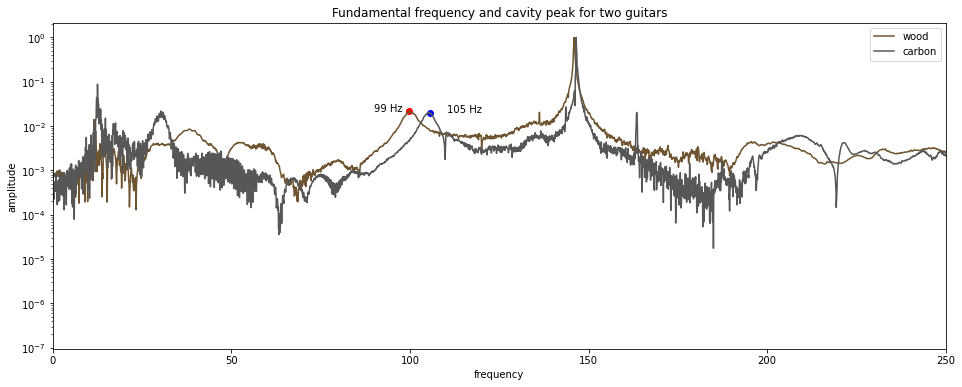

In [424]:
plt.figure(figsize=(16,6))

wood.signal.plot('fft', label='wood', color = (111/255, 84/255, 48/255))
carbon.signal.plot('fft', label='carbon', color=(87/256, 87/256, 87/256 ))
plt.scatter(wood.signal.cavity_frequency(), wood.signal.fft()[wood.signal.cavity_peak()], c='r')
plt.annotate(str(int(wood.signal.cavity_frequency())) + ' Hz', (wood.signal.cavity_frequency()-10, wood.signal.fft()[wood.signal.cavity_peak()]))
plt.scatter(carbon.signal.cavity_frequency(), carbon.signal.fft()[carbon.signal.cavity_peak()], c='b')
plt.annotate(str(int(carbon.signal.cavity_frequency())) + ' Hz', (carbon.signal.cavity_frequency()+5, carbon.signal.fft()[carbon.signal.cavity_peak()]))
plt.legend()
plt.xlim(0,250)
plt.title('Fundamental frequency and cavity peak for two guitars')

plt.show()

## Bonus
Fuzzy FFT plot for all the sounds in the 'test_leste' dataset

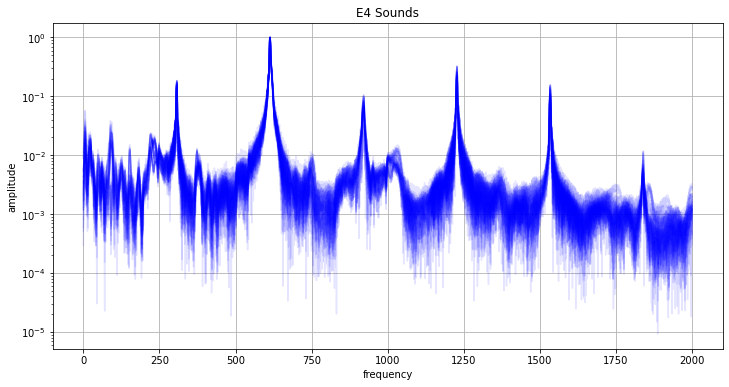

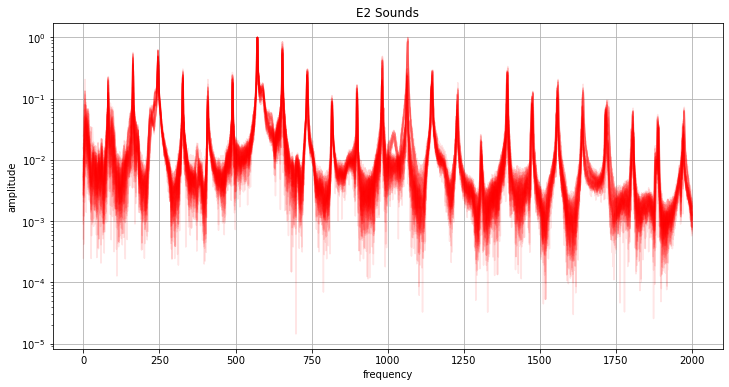

In [435]:
sounds1 = [sound for sound in sounds if sound.signal.fundamental()>100] # Only the Higher ones
plt.figure(figsize=(12,6))
for sound in sounds1:
    sound.signal.plot('fft', alpha = 0.1, color='b')
plt.title('E4 Sounds')
plt.grid('on')

sounds2 = [sound for sound in sounds if sound.signal.fundamental()<100] # Only the Higher ones
plt.figure(figsize=(12,6))
for sound in sounds2:
    sound.signal.plot('fft', alpha = 0.1, color='r')
plt.title('E2 Sounds')
plt.grid('on')

plt.show()